# Decision tree classification and regression

## 1. Data import

In [1]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [2]:
df_data_breast_cancer = data_breast_cancer.frame
df_data_breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


**In this project we will train Decision Tree Models to classify new cases of WDBC into Malignant Tumors and Benign Tumors.**

**In the LnearSVC/SVC project we used metrics "mean area", "mean smoothness", so this time we will choose "mean texture", "mean symmetry".**

In [3]:
from sklearn.model_selection import train_test_split
X = df_data_breast_cancer.iloc[:,:-1]
y = df_data_breast_cancer['target']
X = X[["mean texture", "mean symmetry"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

## 2. Data classification with Decision Trees

**Decision Trees are an attractive classification model because they can adapt well to data 
and capture nonlinear relationships between features and classes. They are also easy to interpret.
However, they are prone to overfitting, especially when not properly regularized.
To address this, in this section we will control model complexity using the `max_depth` parameter,
aiming to find a good balance between performance and generalization.**

**Note: There are also other hyperparameters worth exploring — such as `min_samples_leaf`, 
`min_samples_split`, or `max_leaf_nodes` — which can further help in preventing overfitting. 
In this project, we focus only on tuning `max_depth`, but testing these additional parameters
might lead to even better model performance.**

In [4]:
from sklearn.tree import DecisionTreeClassifier
best_score = 0
X_graph = []
Y_graph_train = []
Y_graph_test = []
best_classification_results = []

for iter in range(2,20):
    print(f"----***{iter}***----")
    tree_clf = DecisionTreeClassifier(max_depth=iter, random_state=42)
    tree_clf.fit(X_train, y_train) # we train model on data from train part
    
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    train_f1_score = f1_score(y_train_pred, y_train)
    test_f1_score = f1_score(y_test_pred, y_test)
    print(f"train f1_score: {train_f1_score} - test f1_score: {test_f1_score}")
    train_accuracy = tree_clf.score(X_train, y_train)
    test_accuracy = tree_clf.score(X_test, y_test)
    print(f"train accuracy: {train_accuracy} - test accuracy: {test_accuracy}")
    print("---------------------")
    if best_score < test_f1_score:
        best_score = test_f1_score
        best_classification_results = [iter, train_f1_score, test_f1_score, train_accuracy, test_accuracy]
    X_graph.append(iter)
    Y_graph_train.append(train_f1_score)
    Y_graph_test.append(test_f1_score)
    
print(best_classification_results)
    

----***2***----
train f1_score: 0.8372881355932204 - test f1_score: 0.7785234899328859
train accuracy: 0.789010989010989 - test accuracy: 0.7105263157894737
---------------------
----***3***----
train f1_score: 0.847571189279732 - test f1_score: 0.7814569536423841
train accuracy: 0.8 - test accuracy: 0.7105263157894737
---------------------
----***4***----
train f1_score: 0.8590381426202321 - test f1_score: 0.7712418300653595
train accuracy: 0.8131868131868132 - test accuracy: 0.6929824561403509
---------------------
----***5***----
train f1_score: 0.8682432432432432 - test f1_score: 0.7733333333333333
train accuracy: 0.8285714285714286 - test accuracy: 0.7017543859649122
---------------------
----***6***----
train f1_score: 0.8908145580589255 - test f1_score: 0.7482993197278912
train accuracy: 0.8615384615384616 - test accuracy: 0.6754385964912281
---------------------
----***7***----
train f1_score: 0.9087779690189329 - test f1_score: 0.7297297297297297
train accuracy: 0.883516483516

**We create a png file with the visualization of the decision tree with paramaters guaranteeing best accuracy max(f1_test_score)**

In [5]:
tree_clf = DecisionTreeClassifier(max_depth= best_classification_results[0], random_state=42)
tree_clf.fit(X_train, y_train) # we train model on data from train part

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
from sklearn.tree import export_graphviz
f = "bc.dot"
export_graphviz(tree_clf, out_file=f, feature_names= list(X.columns), 
                class_names=[str(num)+", "+name for num,name in zip(set(y), data_breast_cancer.target_names)],
                rounded=True, filled=True)

**textual version of the decision tree**

In [7]:
from sklearn import tree

string_tree = tree.export_graphviz(tree_clf)
print(string_tree)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 19.61\ngini = 0.469\nsamples = 455\nvalue = [171, 284]"] ;
1 [label="x[1] <= 0.212\ngini = 0.28\nsamples = 255\nvalue = [43, 212]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[0] <= 16.845\ngini = 0.23\nsamples = 234\nvalue = [31, 203]"] ;
1 -> 2 ;
3 [label="gini = 0.115\nsamples = 131\nvalue = [8, 123]"] ;
2 -> 3 ;
4 [label="gini = 0.347\nsamples = 103\nvalue = [23, 80]"] ;
2 -> 4 ;
5 [label="x[0] <= 15.745\ngini = 0.49\nsamples = 21\nvalue = [12, 9]"] ;
1 -> 5 ;
6 [label="gini = 0.245\nsamples = 7\nvalue = [1, 6]"] ;
5 -> 6 ;
7 [label="gini = 0.337\nsamples = 14\nvalue = [11, 3]"] ;
5 -> 7 ;
8 [label="x[1] <= 0.172\ngini = 0.461\nsamples = 200\nvalue = [128, 72]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="x[1] <= 0.141\ngini = 0.475\nsamples = 72\nvalue = [28, 44]"] ;
8 -> 9 ;
10 [label="gini = 0.18\nsamples = 10\nva

**and now depiction of the visualization**

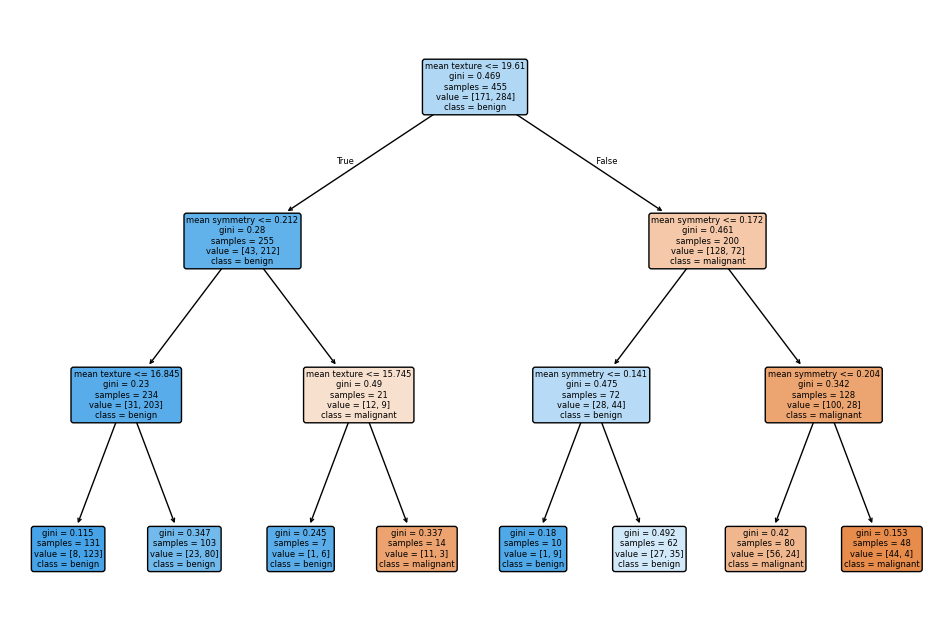

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, 
          feature_names=X.columns, 
          class_names=data_breast_cancer.target_names, 
          filled=True, 
          rounded=True)
plt.savefig("bc.png")  # saving to png file
plt.show()             # show in the jupyter notebook

**Below we have a comparison of F1_score for train and test dataset for consequtive max_depths of the tree**

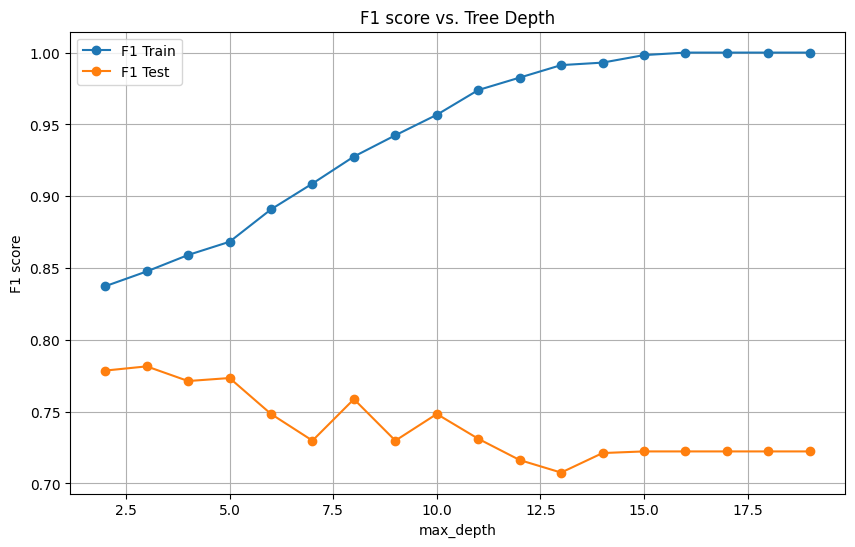

In [9]:
# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(X_graph, Y_graph_train, label="F1 Train", marker='o')
plt.plot(X_graph, Y_graph_test, label="F1 Test", marker='o')
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.title("F1 score vs. Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

**As shown in the plot, increasing `max_depth` leads to a continuous improvement in training F1 score, 
eventually reaching perfect classification. However, the F1 score on the test set initially improves 
but quickly drops and fluctuates at a lower level. This is a typical sign of overfitting — the model 
becomes too specialized to the training data and loses its ability to generalize. 
It confirms the importance of tuning `max_depth` to find the optimal complexity of the decision tree.**

**We save the hyperparamteters of the most accurace decision tree into pickle file**

In [10]:
import pickle

with open('f1acc_tree.pkl', 'wb') as f:
    pickle.dump(best_classification_results, f)

## 3. Data regression with Decision Trees

<Axes: xlabel='x', ylabel='y'>

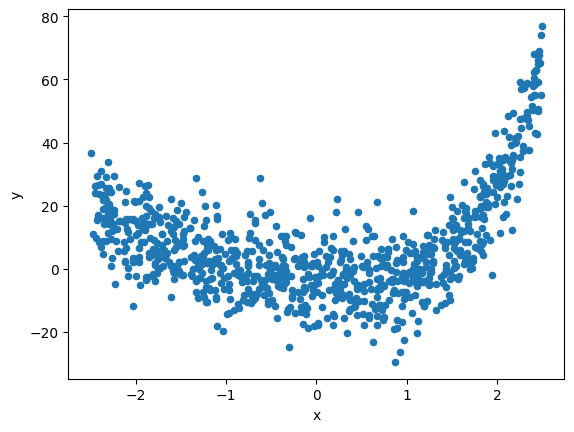

In [11]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [12]:
from sklearn.tree import DecisionTreeRegressor

print(X.shape)
X = X.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
y = y.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
print(X.shape)

(900,)
(900, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

**Now we will use DecisionTreeRegressor class in order to perform regression on the data (model groups parts of data into sectors where proposed value is the avarage of all the data points int this grouped sector)**

In [14]:
from sklearn.tree import DecisionTreeClassifier
best_score = float('inf')
best_regression_results = []
for iter in range(2,20):

    tree_reg = DecisionTreeRegressor(max_depth=iter, random_state=42)
    tree_reg.fit(X_train, y_train) # we train model on data from train part
    
    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)
    
    from sklearn.metrics import mean_squared_error

    train_MSE = mean_squared_error(y_train_pred, y_train)
    test_MSE = mean_squared_error(y_test_pred, y_test)
    
    print(f"FOR DEPTH: {iter},     train_MSE: {train_MSE} - test_MSE: {test_MSE}")
    
    if best_score > 3 * test_MSE + train_MSE:
        best_score = 3 * test_MSE + train_MSE
        best_regression_results = [iter, train_MSE, test_MSE]   
print(best_regression_results)

FOR DEPTH: 2,     train_MSE: 97.27074615994503 - test_MSE: 93.12147438473346
FOR DEPTH: 3,     train_MSE: 78.40729890277021 - test_MSE: 70.89389739343626
FOR DEPTH: 4,     train_MSE: 68.8171418192522 - test_MSE: 62.82562910244861
FOR DEPTH: 5,     train_MSE: 64.6287181334097 - test_MSE: 68.98663430158362
FOR DEPTH: 6,     train_MSE: 59.65079831133299 - test_MSE: 74.14935275469615
FOR DEPTH: 7,     train_MSE: 55.14735403174283 - test_MSE: 78.9500178568422
FOR DEPTH: 8,     train_MSE: 51.62630407139513 - test_MSE: 77.60140975075825
FOR DEPTH: 9,     train_MSE: 47.89490361250592 - test_MSE: 82.43489056148996
FOR DEPTH: 10,     train_MSE: 43.318559223299616 - test_MSE: 85.62510606166659
FOR DEPTH: 11,     train_MSE: 36.93692105324637 - test_MSE: 91.07687599444805
FOR DEPTH: 12,     train_MSE: 31.380990330919335 - test_MSE: 93.08520689956082
FOR DEPTH: 13,     train_MSE: 26.45038259192385 - test_MSE: 99.3663095723267
FOR DEPTH: 14,     train_MSE: 20.83198118700428 - test_MSE: 103.3607567375

**depiction of the visualization of the tree with parameters providing best accuracy: min(3 * test_mse + train_mse).**  
**We want to focus on good prediction for new data, so we encourage model to focus on test_mse by multiplying test_mse by 3 in the minimalising function.**

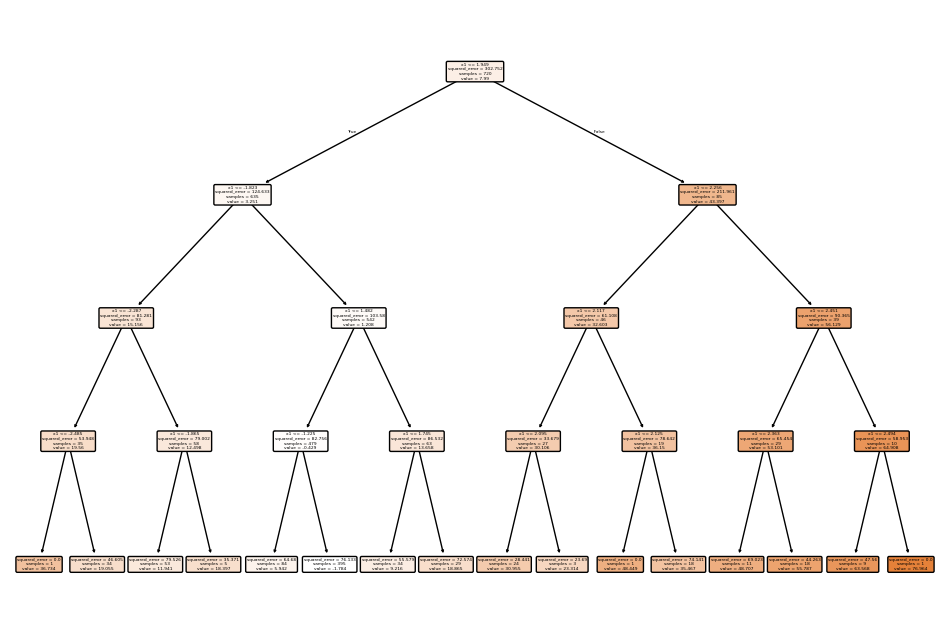

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_reg = DecisionTreeRegressor(max_depth = best_regression_results[0], random_state=42)
tree_reg.fit(X_train, y_train) # we train model on data from train part

plt.figure(figsize=(12, 8))
plot_tree(tree_reg, 
          feature_names=["x1"], 
          filled=True, 
          rounded=True)
plt.savefig("reg.png")  # saving to png file
plt.show()             # show int the jupyter notebook

**and now we will create a visualsation of the regression that our tree model proposed for the parameters providing best accuracy**

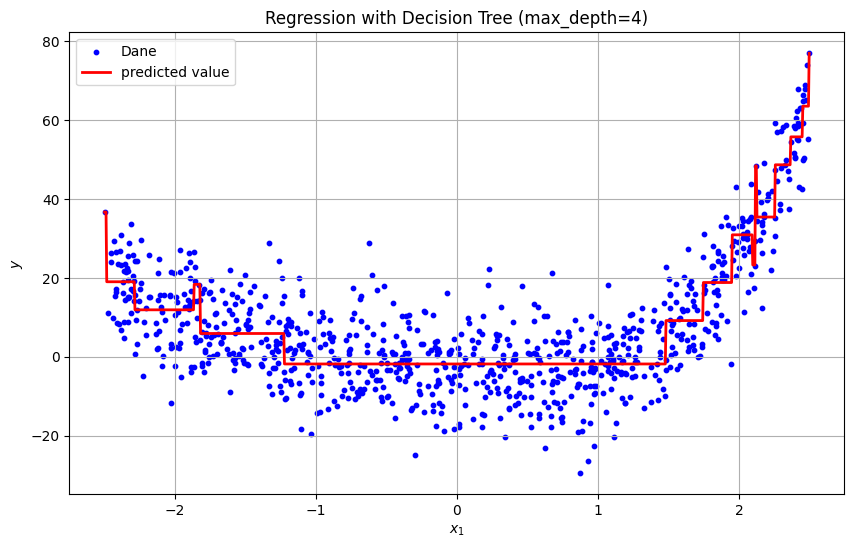

In [16]:
x_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = tree_reg.predict(x_grid)

# Visualisation of the regression on data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=10, color='blue', label='Dane')
plt.plot(x_grid, y_pred, color='red', linewidth=2, label='predicted value')
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title(f"Regression with Decision Tree (max_depth={best_regression_results[0]})")
plt.legend()
plt.grid(True)
#plt.savefig("reg_additional.png")  # if this file needed too
plt.show()


**We save the hyperparamteters of the most accurace decision tree into pickle file**

In [17]:
import pickle

with open('mse_tree.pkl', 'wb') as f:
    pickle.dump(best_regression_results, f)